<a href="https://colab.research.google.com/github/shriyageetika/AQI/blob/main/Copy_of_AQDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HANDLING MISSING VALUES IN PYTHON**

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
uploaded = files.upload()

Saving station_day.csv to station_day.csv
Saving city_hour.csv to city_hour.csv
Saving city_day.csv to city_day.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['station_day.csv']))
df = pd.read_csv(io.BytesIO(uploaded['city_hour.csv']))
df = pd.read_csv(io.BytesIO(uploaded['city_day.csv']))
print(df.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [ ]:
! ls

city_day.csv	  city_hour.csv      drive	  station_day.csv
city_day.csv.zip  city_hour.csv.zip  sample_data  station_day.csv.zip


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#**Data**


  Air Quality Data in India (2015 - 2020) for Time Series problem


In [ ]:
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno

In [ ]:
test=pd.read_csv('city_hour.csv')
test=pd.read_csv('station_day.csv')
test=pd.read_csv('city_day.csv')
print('Testing data shape: ', test.shape)
test.head()

Testing data shape:  (28169, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
train=pd.read_csv('city_hour.csv')
train=pd.read_csv('station_day.csv')
test=pd.read_csv('city_day.csv')

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

# First few rows of the training dataset
train.head()



Training data shape:  (104355, 16)
Testing data shape:  (28169, 16)


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


from matplotlib import pyplot as plt
_df_0['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['NO'].plot(kind='hist', bins=20, title='NO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['NO2'].plot(kind='hist', bins=20, title='NO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('AQI_Bucket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='PM2.5', y='PM10', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PM10', y='NO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='NO', y='NO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='NO2', y='NOx', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['PM2.5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('PM2.5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['PM2.5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AQI_Bucket')):
  _plot_series(series, series_name, i)
  fig.legend(title='AQI_Bucket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('PM2.5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['PM10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('PM10')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['PM10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AQI_Bucket')):
  _plot_series(series, series_name, i)
  fig.legend(title='AQI_Bucket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('PM10')

from matplotlib import pyplot as plt
_df_14['PM2.5'].plot(kind='line', figsize=(8, 4), title='PM2.5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['NO'].plot(kind='line', figsize=(8, 4), title='NO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['NO2'].plot(kind='line', figsize=(8, 4), title='NO2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AQI_Bucket'].value_counts()
    for x_label, grp in _df_18.groupby('Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Date')
_ = plt.ylabel('AQI_Bucket')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='PM2.5', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['AQI_Bucket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='PM2.5', y='AQI_Bucket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='PM10', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['AQI_Bucket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='PM10', y='AQI_Bucket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
train['AQI'].value_counts()

,count
AQI,
104.0,589
102.0,573
106.0,568
108.0,549
100.0,534
...,...
1613.0,1
1423.0,1
1917.0,1


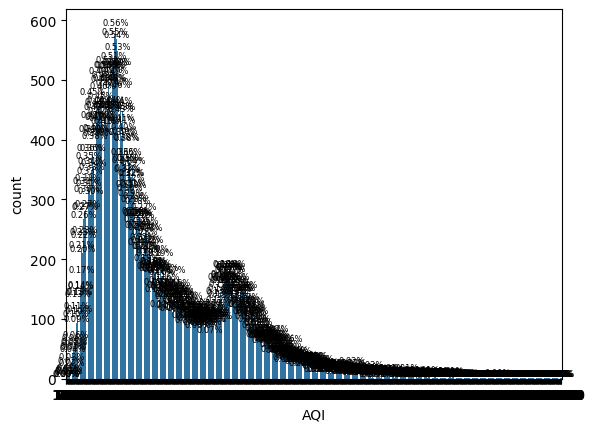

In [ ]:
s = sns.countplot(x = 'AQI',data = train)
sizes=[5,16]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=6)


#**Detecting Missing values**
Detecting missing values numerically

The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.



In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
train_missing= missing_values_table(train)
train_missing

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,82102,78.7
NH3,47072,45.1
PM10,41740,40.0
Toluene,37162,35.6
Benzene,30467,29.2
O3,24966,23.9
SO2,24894,23.9
PM2.5,21241,20.4
AQI,20644,19.8
AQI_Bucket,20644,19.8


In [ ]:
test_missing= missing_values_table(test)
test_missing

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,16989,60.3
PM10,11005,39.1
NH3,10121,35.9
Toluene,7715,27.4
Benzene,5386,19.1
AQI,4575,16.2
AQI_Bucket,4575,16.2
PM2.5,4552,16.2
NOx,4142,14.7
O3,3888,13.8



#**Detecting missing data visually using Missingno library**

To graphically analyse the missingness of the data, let's use a library called Missingno It is a package for graphical analysis of missing values. To use this library, we need to import it as follows: import missingno as msno



<Axes: >

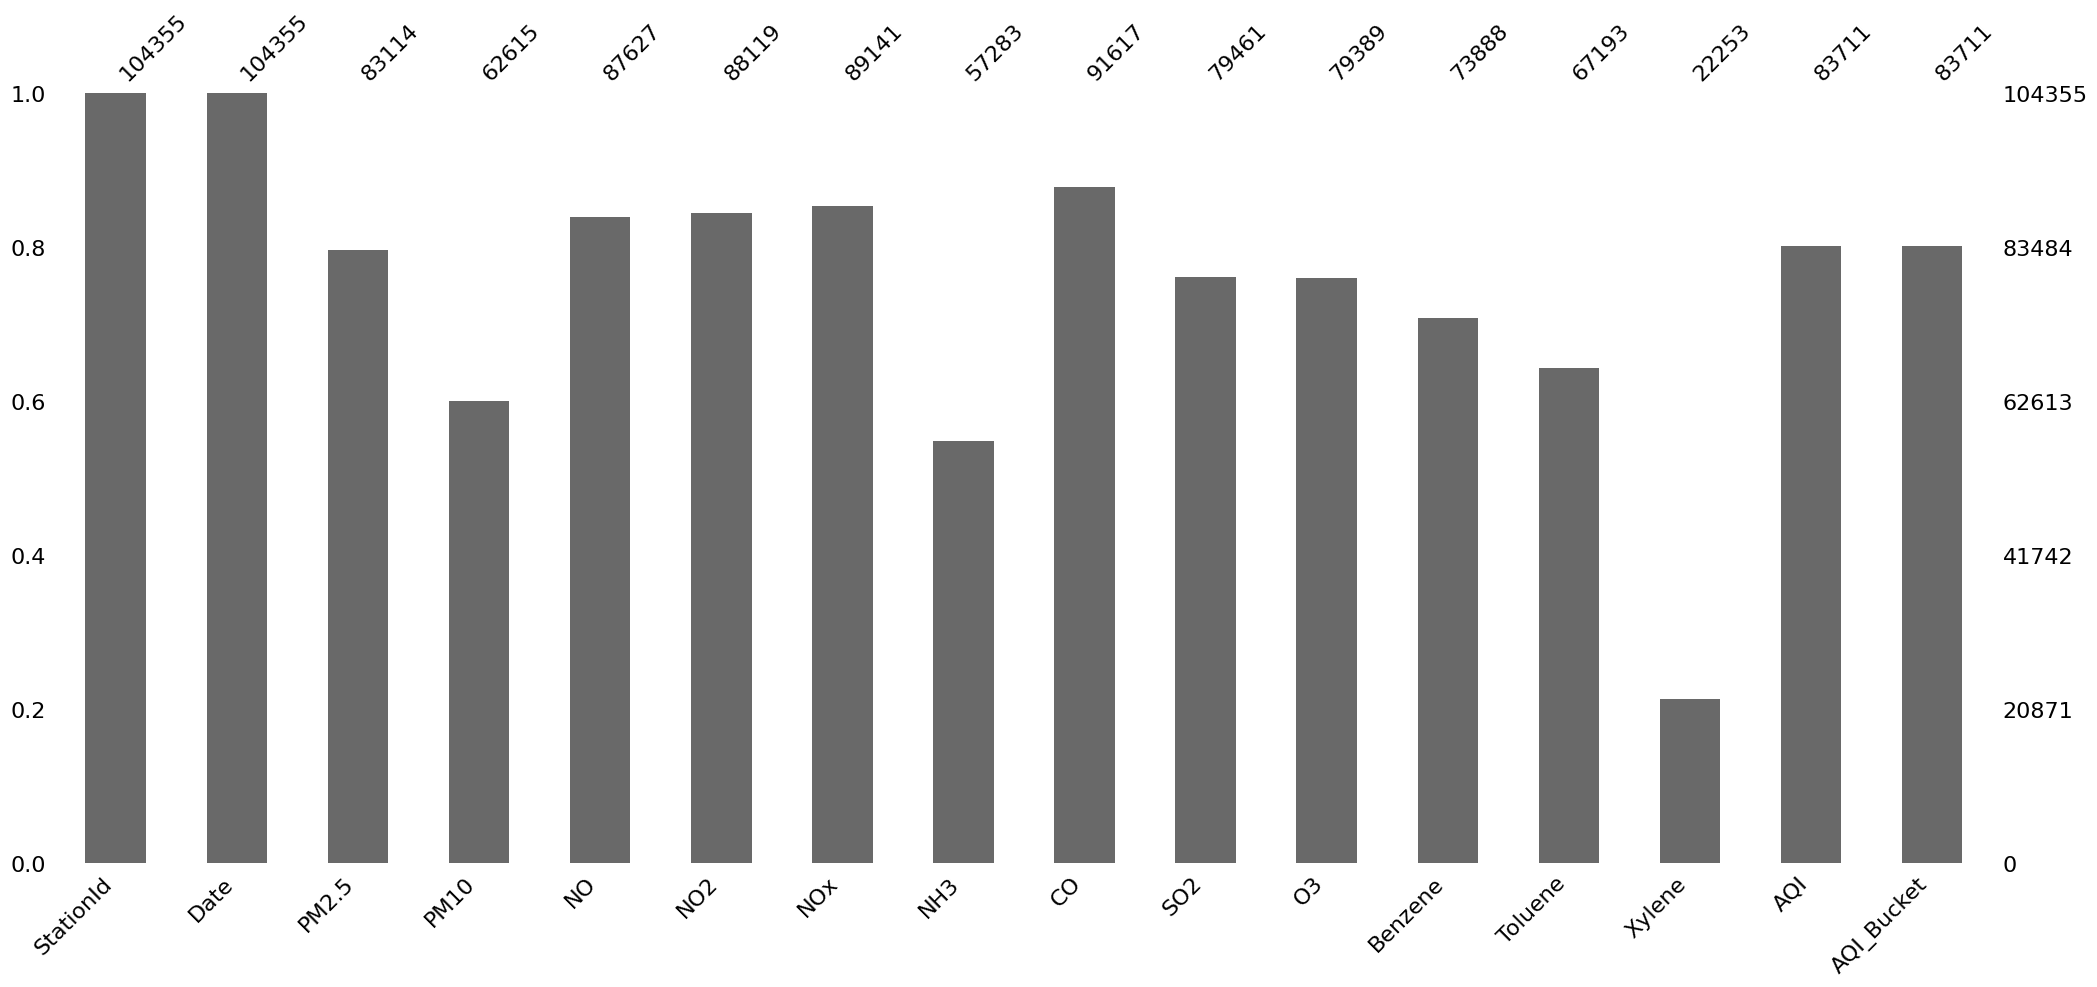

In [ ]:
msno.bar(train)


#**Visualizing the locations of the missing data**

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.



<Axes: >

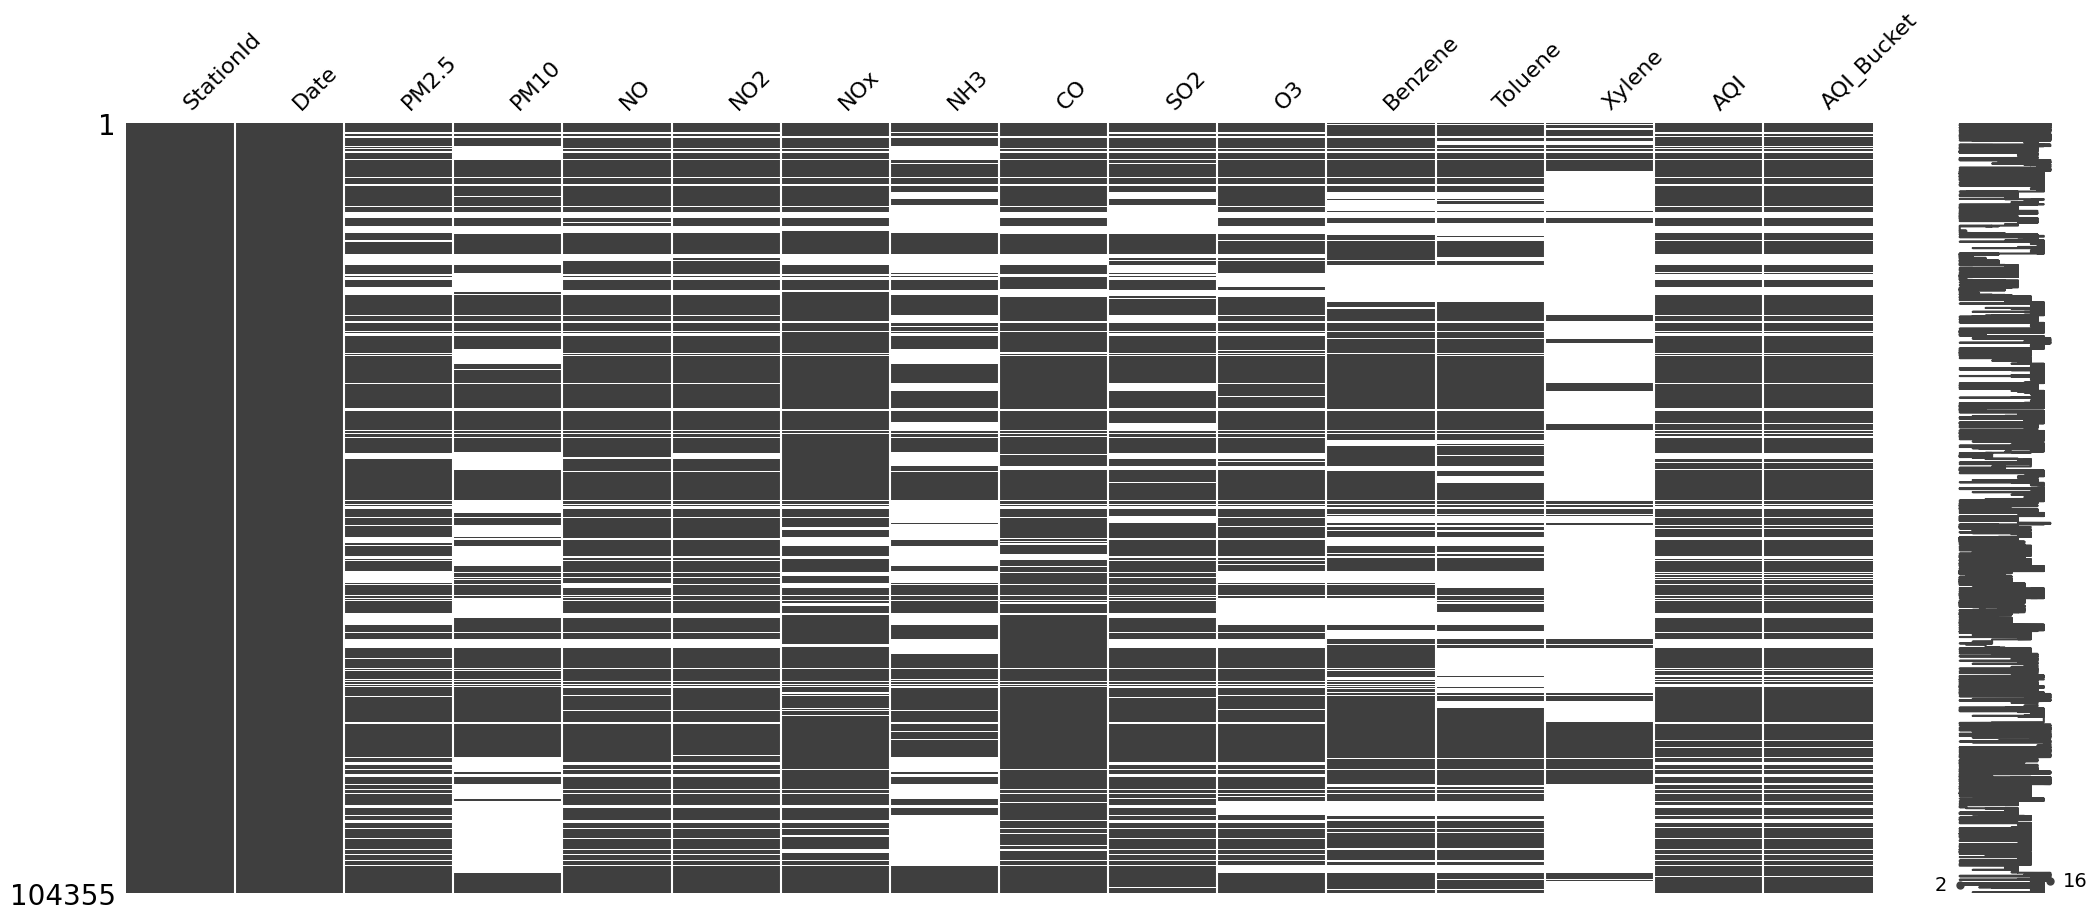

In [ ]:
msno.matrix(train)

<Axes: >

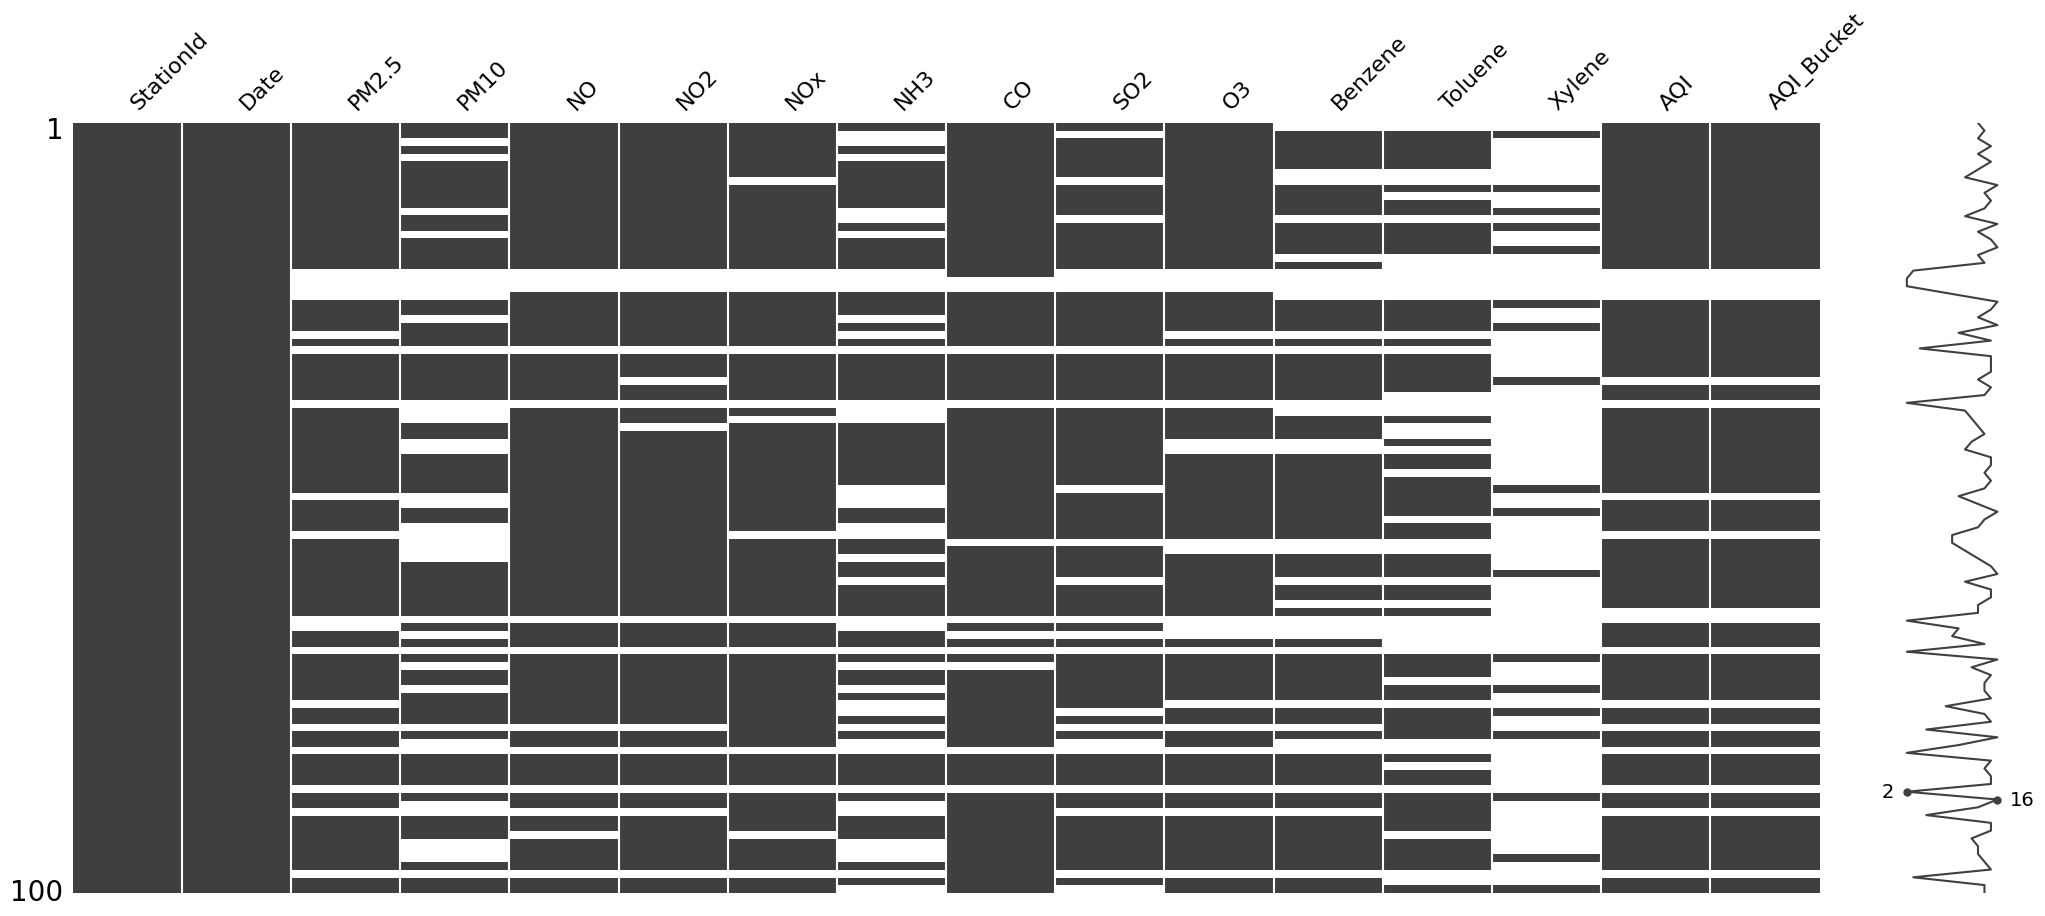

In [ ]:
msno.matrix(train.sample(100))

#**Reasons for Missing Values**

1. **Missing Completely at Random (MCAR)**

    The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

2. **Missing at Random (MAR)**

    MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

3. **Missing Not at Random (MNAR)**

    Missingness depends on unobserved data or the value of the missing data itself

#**Finding reason for missing data using matrix plot**

<Axes: >

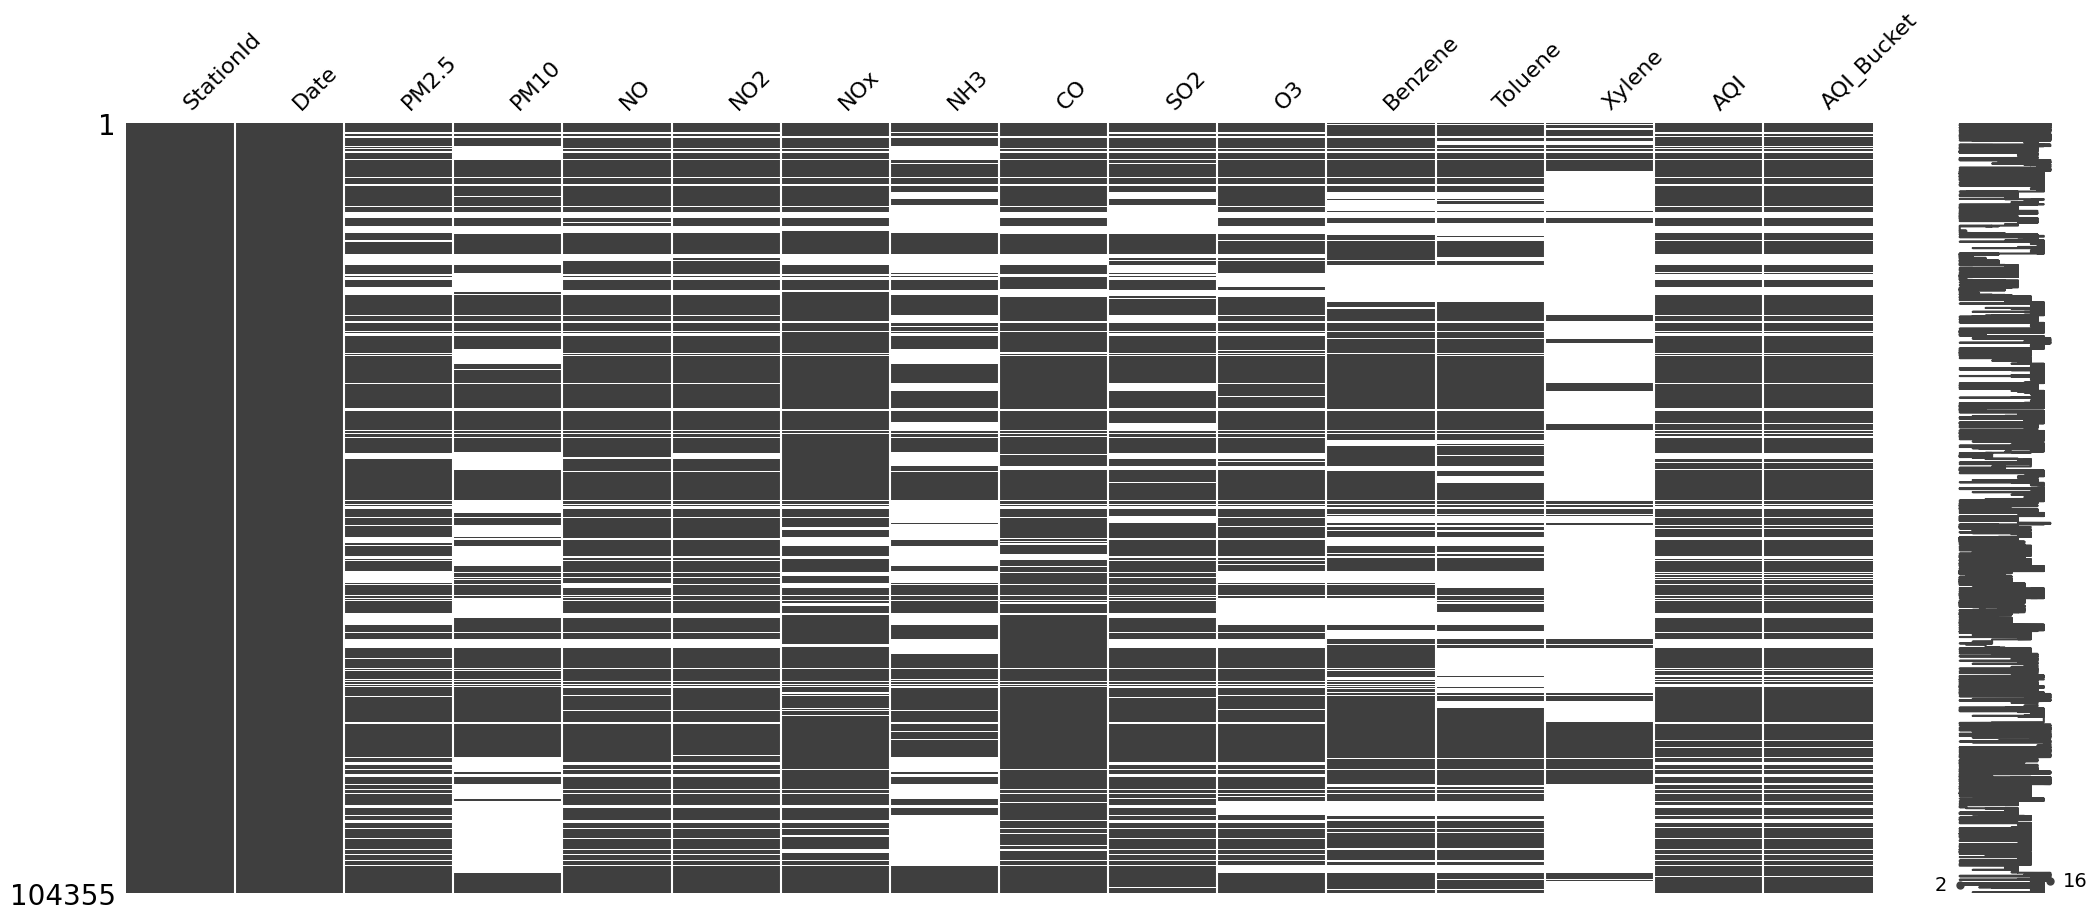

In [ ]:
msno.matrix(train)

<Axes: >

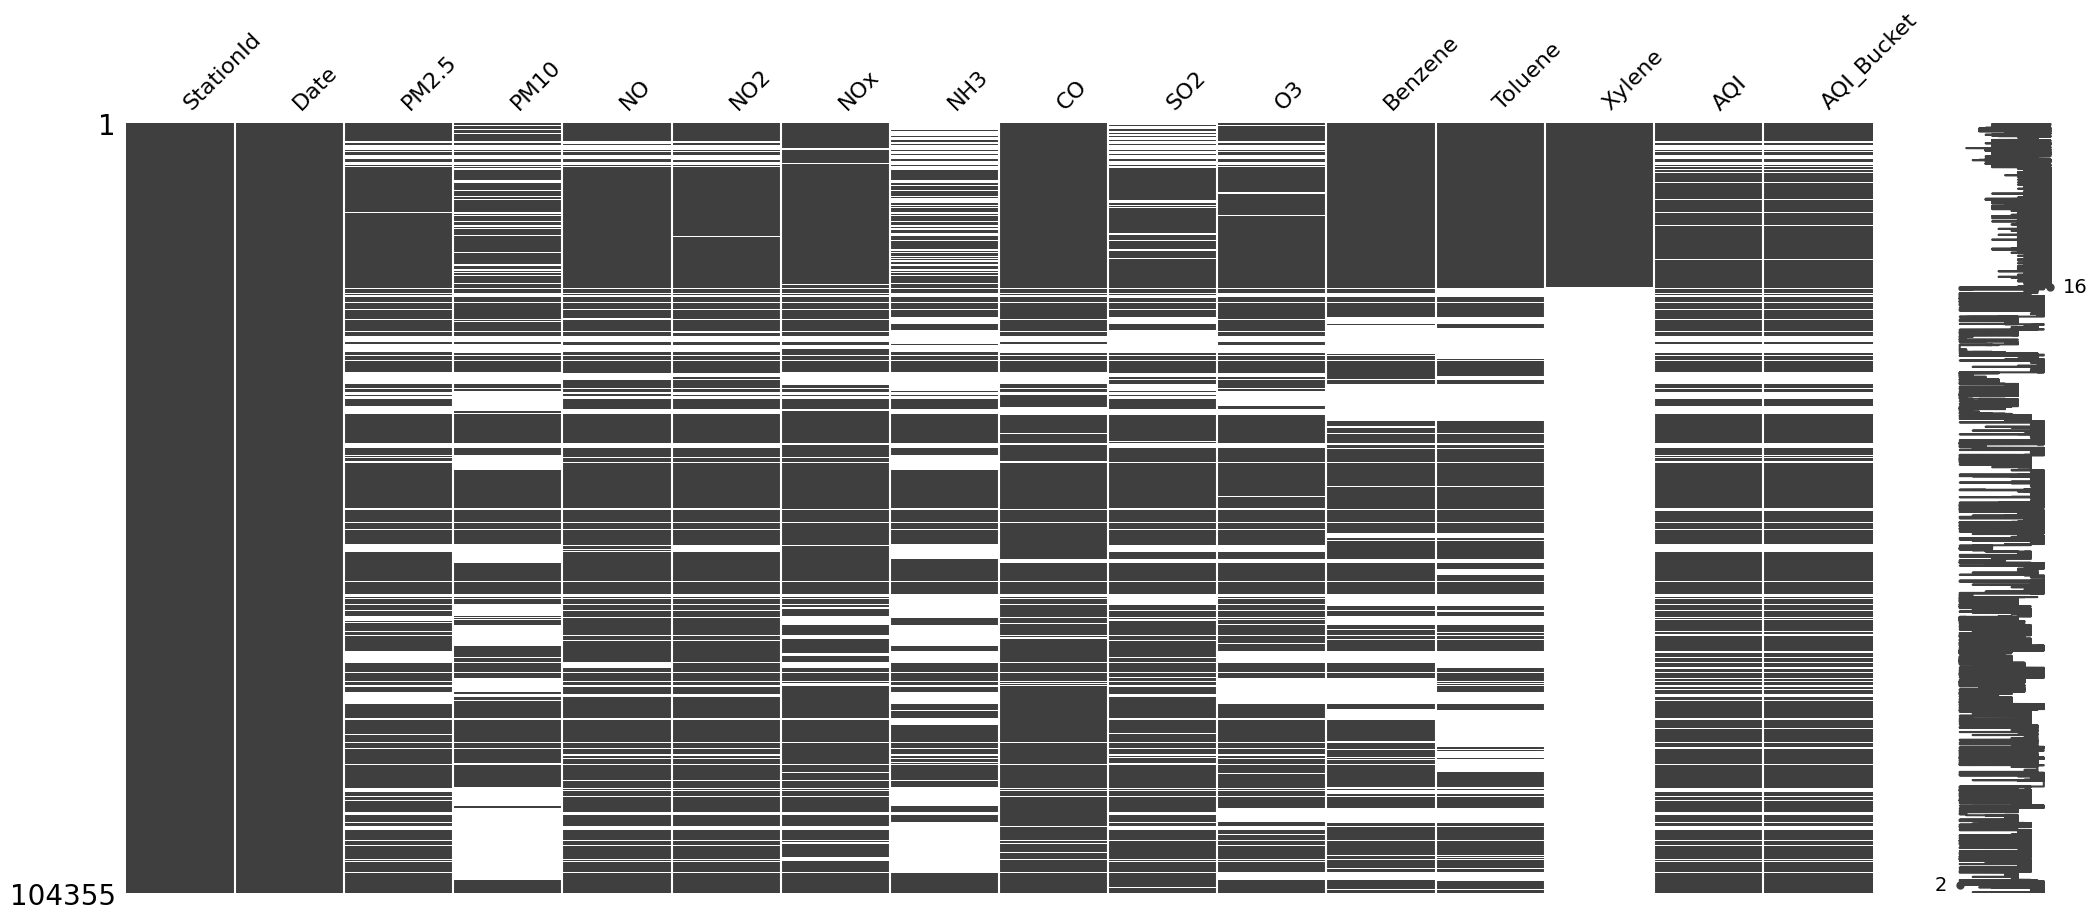

In [ ]:
sorted = train.sort_values('Xylene')
msno.matrix(sorted)


#**Finding reason for missing data using a Heatmap**


<Axes: >

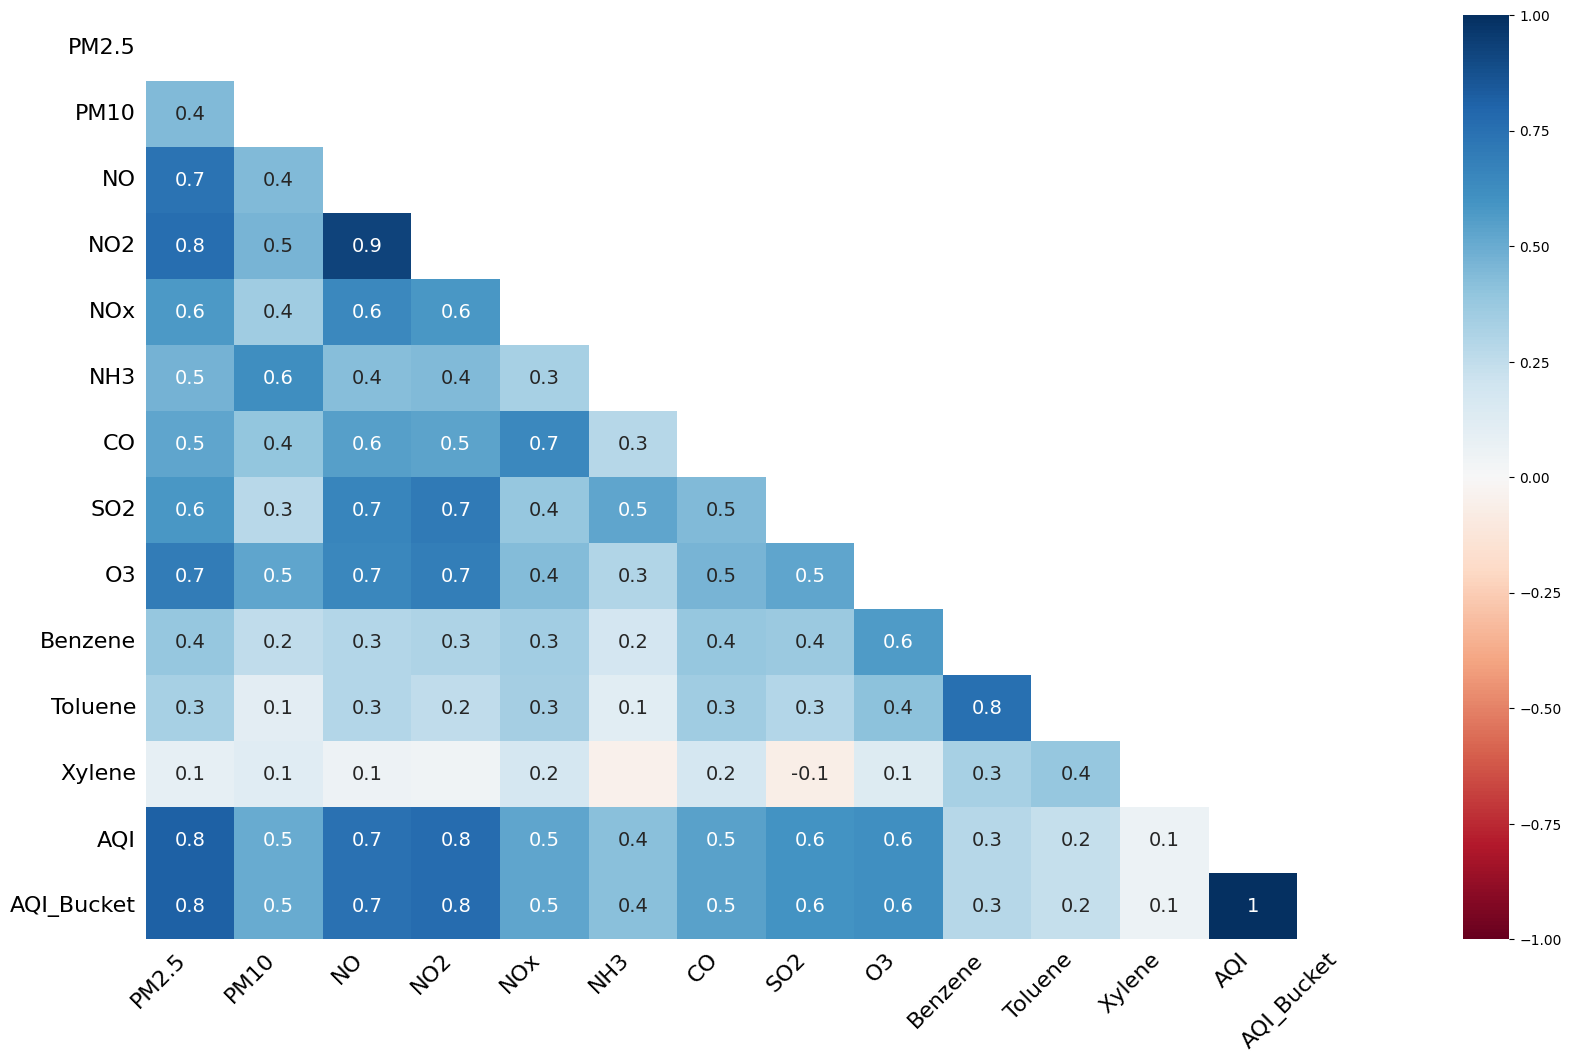

In [ ]:
msno.heatmap(train)

#**Finding reason for missing data using Dendrogram**

<Axes: >

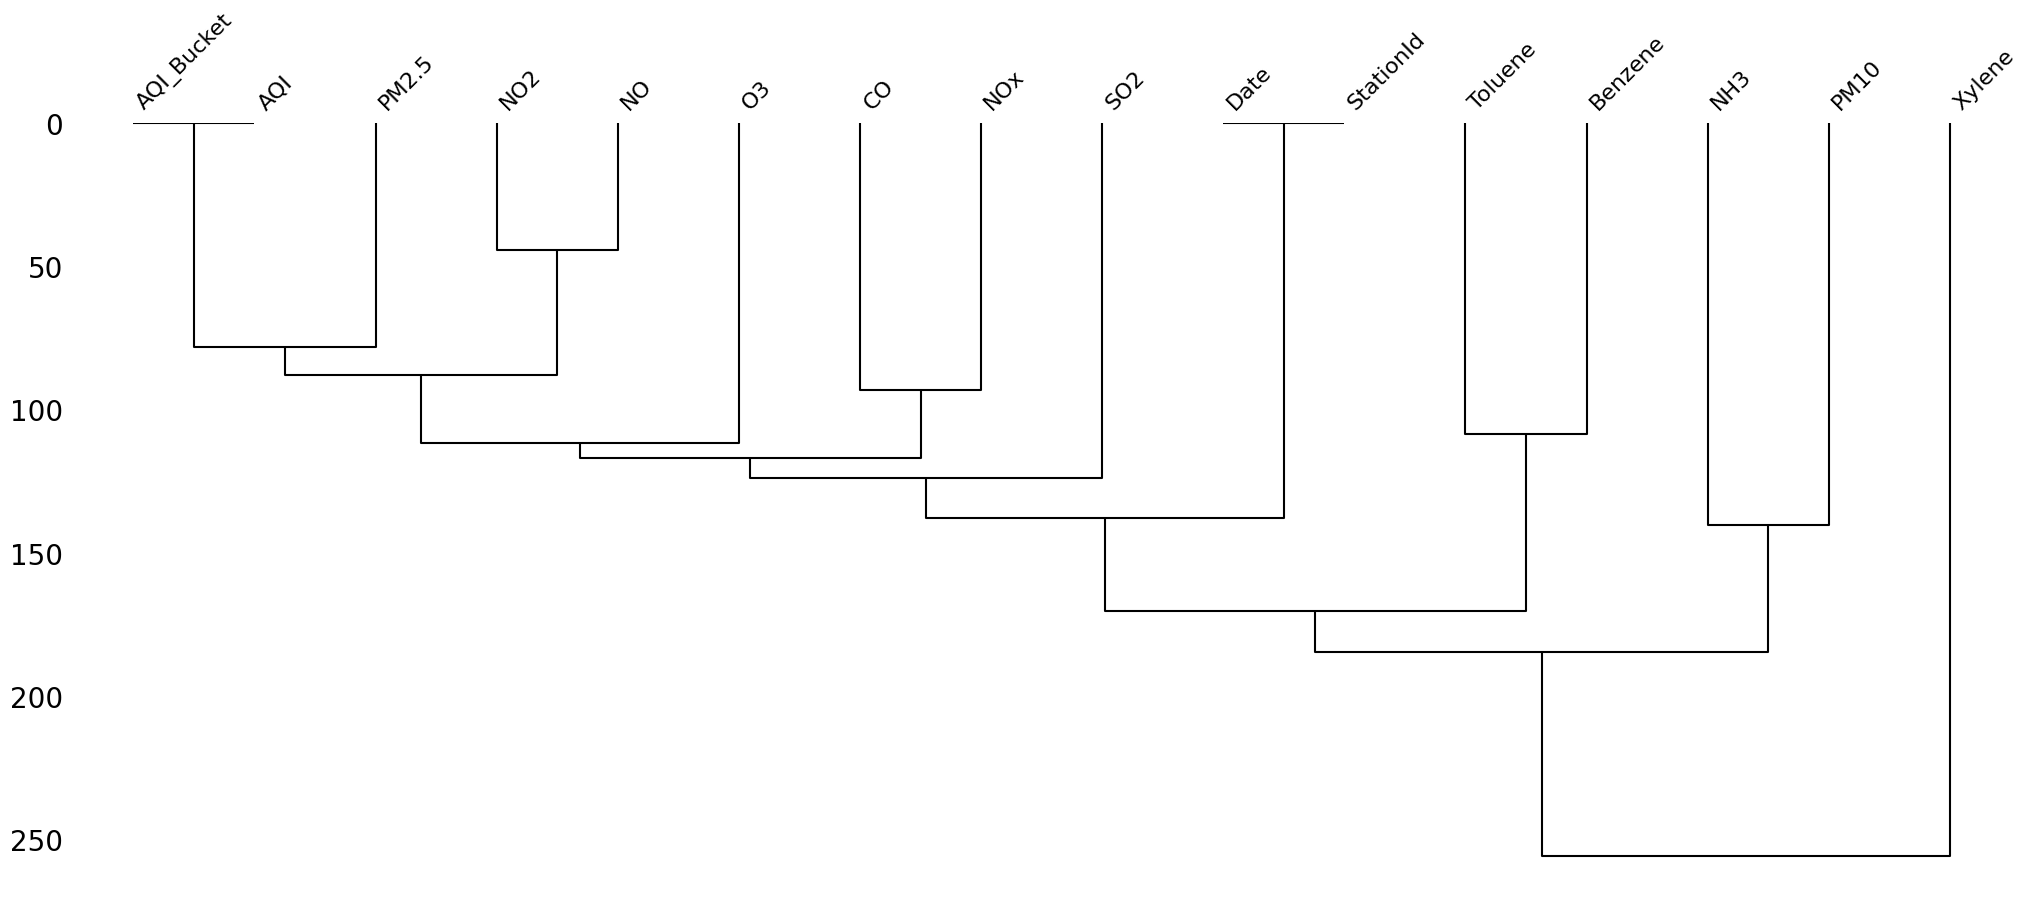

In [ ]:
msno.dendrogram(train)

#**Treating Missing values**

*Pairwise* *Deletion*

In [ ]:
train.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21241
PM10,41740
NO,16728
NO2,16236
NOx,15214
NH3,47072
CO,12738
SO2,24894


In [ ]:
train_1 = train.copy()
train_1['Xylene'].mean()

2.4476102098593446

*Listwise Deletion/ Dropping rows*

In [ ]:
train_1.dropna(subset=['Xylene'],how='any',inplace=True)
train_1['Xylene'].isnull().sum()

0

**Missing values amd their percentage of total values**

In [ ]:
city_day_missing= missing_values_table(city_day)
city_day_missing

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,16989,60.3
PM10,11005,39.1
NH3,10121,35.9
Toluene,7715,27.4
Benzene,5386,19.1
AQI,4575,16.2
AQI_Bucket,4575,16.2
PM2.5,4552,16.2
NOx,4142,14.7
O3,3888,13.8


There are a lot of missing values and some of the columns like Xylene and PM10 have more than 50% of the values missing. Let's now see how we can impute these missing values.

In [ ]:
city_day1['Xylene'][50:65]

,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,NaN
2015-02-27,NaN
2015-02-28,NaN


Above we see, there are 3 missing values in the Xylene column.

**Imputing using ffill**

In [ ]:
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:65]

<ipython-input-84-80466fa4ca55>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day.fillna(method='ffill',inplace=True)


,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,0.81
2015-02-27,0.81
2015-02-28,0.81


**Imputing using bfill**

In [ ]:
city_day['AQI'][20:30]

,AQI
Date,
2015-01-21,NaN
2015-01-22,NaN
2015-01-23,NaN
2015-01-24,NaN
2015-01-25,NaN
2015-01-26,NaN
2015-01-27,NaN
2015-01-28,NaN
2015-01-29,209.0


In [ ]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]


<ipython-input-86-69f643dfe860>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day.fillna(method='bfill',inplace=True)


,AQI
Date,
2015-01-21,209.0
2015-01-22,209.0
2015-01-23,209.0
2015-01-24,209.0
2015-01-25,209.0
2015-01-26,209.0
2015-01-27,209.0
2015-01-28,209.0
2015-01-29,209.0


#**Imputation using Linear Interpolation method**

Time series data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the ebst possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [ ]:
city_day1['Xylene'][50:65]

,Xylene
Date,
2015-02-20,7.4800
2015-02-21,15.4400
2015-02-22,8.4700
2015-02-23,28.4600
2015-02-24,6.0500
2015-02-25,0.8100
2015-02-26,0.9375
2015-02-27,1.0650
2015-02-28,1.1925


In [ ]:
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]


<ipython-input-82-8740fd366178>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  city_day1.interpolate(limit_direction="both",inplace=True)


,Xylene
Date,
2015-02-20,7.4800
2015-02-21,15.4400
2015-02-22,8.4700
2015-02-23,28.4600
2015-02-24,6.0500
2015-02-25,0.8100
2015-02-26,0.9375
2015-02-27,1.0650
2015-02-28,1.1925
